In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ben.horowitz/.local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['figure', 'axes', 'ndim']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
!nvidia-smi


Sat Oct 29 05:22:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 16%   38C    P8     1W / 250W |      0MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1B:00.0 Off |                  N/A |
| 16%   

In [3]:
!nvidia-smi
import os

#using GPU, comment out if on CPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

Sat Oct 29 05:22:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 16%   37C    P8     1W / 250W |      0MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1B:00.0 Off |                  N/A |
| 16%   

In [7]:
import tensorflow_probability as tfp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
mcmc = np.load("./MCMC_Samples_5D_102122.npy")
hmc = np.load("./HMC_Samples_5D_R1B_1028.npy")


In [29]:
import corner

In [30]:
#corner.corner?

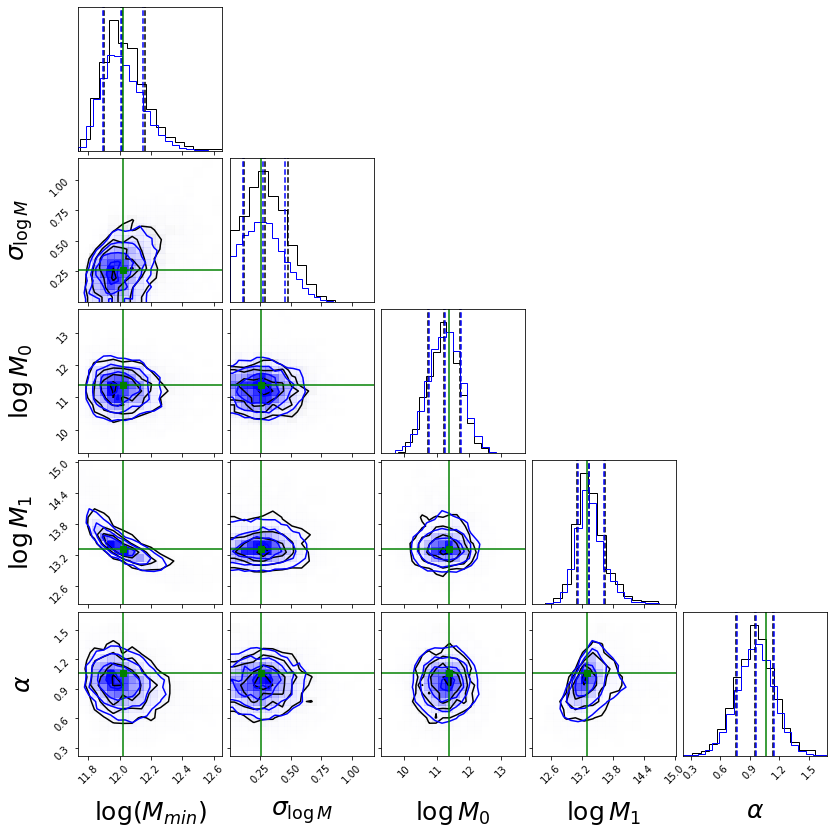

In [53]:
hmc_chain = np.array(hmc[10:,:,:]).reshape(-1,5)[:]
mcmc_chain = np.array(mcmc[:,300:,:]).reshape(-1,5) #200 burnin?

weights = hmc_chain.shape[0]/mcmc_chain.shape[0]
figure = corner.corner(hmc_chain,smooth=0.000,bins=15,plot_datapoints=False,
                      label="DiffHOD",
                      quantiles=[.16,.50,.84],
                      title_quantiles=True);
corner.corner(mcmc_chain, color="blue", 
              fig=figure,weights=1.0*weights*np.ones(mcmc_chain.shape[0]),
              plot_datapoints=False,
             labels=["$\log(M_{min})$","$\sigma_{\log M}$","$\log M_0$","$\log M_1$",r"$\alpha$"],
              label="Halotools",
              label_kwargs={'fontsize':25},
             quantiles=[.16,.50,.84])#"$\log M_0$","$\log M_1$","$\alpha$"]);
#figure.legend()
value1 = [12.02, 0.26, 11.38, 13.31, 1.06] #true values
ndim = 5
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

# Loop over the diagonal
for i in range(ndim):
    ax = axes[i, i]
    ax.axvline(value1[i], color="g")

# Loop over the histograms
for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value1[xi], color="g")
        ax.axhline(value1[yi], color="g")
        ax.plot(value1[xi], value1[yi], "sg")
        

figure.savefig("corner.pdf")
        

In [41]:
#hmc quantiles
[corner.quantile(hmc_chain[:,i], [.16,.50,.84], weights=None) for i in range(0,5)]

[array([11.90114933, 12.01667786, 12.16421978]),
 array([0.12012773, 0.28949524, 0.47334489]),
 array([10.74019039, 11.23768568, 11.70819954]),
 array([13.11334785, 13.34228039, 13.64076523]),
 array([0.75496582, 0.9530246 , 1.13819671])]

In [42]:
#mcmc quantiles
[corner.quantile(mcmc_chain[:,i], [.16,.50,.84], weights=None) for i in range(0,5)]

[array([11.89174673, 12.00566062, 12.14647818]),
 array([0.10737781, 0.27167946, 0.45528272]),
 array([10.76497894, 11.26946511, 11.75969861]),
 array([13.12096316, 13.34084436, 13.63377789]),
 array([0.7701455 , 0.9583796 , 1.14019176])]

In [45]:
x = tfp.mcmc.effective_sample_size(np.swapaxes(hmc[10:],0,1).reshape(-1,5))
print("HMC effective sample per eval:", np.mean(x)/np.swapaxes(hmc,0,1).reshape(-1,5).shape[0])

HMC effective sample per eval: 0.21842361450195313


In [46]:
x = tfp.mcmc.effective_sample_size(mcmc_chain)
print("MCMC effective sample per eval:", np.mean(x)/mcmc_chain.shape[0])

MCMC effective sample per eval: 0.006016334211577265


In [25]:
np.swapaxes(hmc,0,1).reshape(-1,5).shape[0]

6900

In [24]:
mcmc_chain.shape[0]

67000